In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import plotly.express as px
sns.set()

# Data Cleaning

In [312]:
df = pd.read_csv('/content/kia_cars.csv')
df.head()

,city,year,brand,model,color,body_type,engine,engine_power,fuel_type,kilometrage,transmission,drivetrain,new,price
0,Bakı,2014,Kia,Sorento,Yaş Asfalt,Offroader / SUV,2.2 L,197 a.g.,Dizel,129 000 km,Avtomat,Tam,Xeyr,46 300 AZN
1,Bakı,2013,Kia,Rio,Qara,Sedan,1.4 L,107 a.g.,Benzin,160 000 km,Avtomat,Ön,Xeyr,17 500 AZN
2,Bakı,2015,Kia,Sorento,Ağ,Offroader / SUV,2.0 L,184 a.g.,Dizel,82 000 km,Avtomat,Ön,Xeyr,25 900 $
3,Bakı,2011,Kia,Optima,Qara,Sedan,2.0 L,274 a.g.,Benzin,190 000 km,Avtomat,Ön,Xeyr,21 800 AZN
4,Bakı,2008,Kia,Sportage,Ağ,Offroader / SUV,2.0 L,140 a.g.,Dizel,130 000 km,Avtomat,Ön,Xeyr,18 800 AZN


In [313]:
df.shape

(3629, 14)

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3629 entries, 0 to 3628
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          3629 non-null   object
 1   year          3629 non-null   int64 
 2   brand         3629 non-null   object
 3   model         3629 non-null   object
 4   color         3629 non-null   object
 5   body_type     3629 non-null   object
 6   engine        3629 non-null   object
 7   engine_power  3629 non-null   object
 8   fuel_type     3629 non-null   object
 9   kilometrage   3629 non-null   object
 10  transmission  3629 non-null   object
 11  drivetrain    3629 non-null   object
 12  new           3629 non-null   object
 13  price         3629 non-null   object
dtypes: int64(1), object(13)
memory usage: 397.0+ KB


In [315]:
df.isnull().sum()
# We don't have any null value

city            0
year            0
brand           0
model           0
color           0
body_type       0
engine          0
engine_power    0
fuel_type       0
kilometrage     0
transmission    0
drivetrain      0
new             0
price           0
dtype: int64

In [316]:
# Check for duplicates
df.duplicated().sum()

1214

In [317]:
# Remove duplicates
df = df.drop_duplicates()

In [318]:
df.shape

(2415, 14)

# Exploratory Analysis and Visualization

In [319]:
df.head(3)

,city,year,brand,model,color,body_type,engine,engine_power,fuel_type,kilometrage,transmission,drivetrain,new,price
0,Bakı,2014,Kia,Sorento,Yaş Asfalt,Offroader / SUV,2.2 L,197 a.g.,Dizel,129 000 km,Avtomat,Tam,Xeyr,46 300 AZN
1,Bakı,2013,Kia,Rio,Qara,Sedan,1.4 L,107 a.g.,Benzin,160 000 km,Avtomat,Ön,Xeyr,17 500 AZN
2,Bakı,2015,Kia,Sorento,Ağ,Offroader / SUV,2.0 L,184 a.g.,Dizel,82 000 km,Avtomat,Ön,Xeyr,25 900 $


 Firstly, Let's look for inconsistencies in dataset. We can clearly see that when some columns should be numeric column they are in object type. Such as `Price` , `Engine`, `Kilometrage`, `engine_power`. Let's transform them to numeric columns first

### `Price` column

In [320]:
# Since values in price column are in different currencies. we should convert all to AZN
df['currency_price'] = df['price']

In [321]:
df['price'] = df['price'].str.replace(' ', '')
df['price'] = df['price'].str.replace('AZN', '')
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace('€', '')
df['price'] = df['price'].astype(str).astype(int)

In [322]:
df.loc[df['currency_price'].str.contains('\$'), 'price'] = df['price'] * 1.7
# Right now US Dollars to Azerbaijan Manats Exchange Rate is 1.7
df.loc[df['currency_price'].str.contains('€'), 'price'] = df['price'] * 1.9
# Right now Euros to Azerbaijan Manats Exchange Rate is 1.9

In [323]:
df['price(AZN)'] = df['price']
df.drop(['currency_price', 'price'],axis = 1, inplace = True)

### `Engine` column

In [324]:
df['engine'].unique()

array(['2.2 L', '1.4 L', '2.0 L', '1.6 L', '1.5 L', '1.3 L', '3.5 L',
       '3.3 L', '2.5 L', '2.4 L', '2.7 L', '1.0 L', '1.8 L', '1.7 L',
       '3.8 L', '1.1 L', '3.0 L', '1.2 L', '2.8 L', '2.9 L', '4.6 L'],
      dtype=object)

In [326]:
df['engine(L)'] = df['engine'].str.replace(' L','')
df['engine(L)'] = df['engine(L)'].astype(str).astype(float)
df.drop(['engine'], axis = 1, inplace = True)

### `Kilometrage` column

In [327]:
df['kilometrage'].unique()

array(['129 000 km', '160 000 km', '82 000 km', ..., '9 000 km',
       '60 118 km', '171 554 km'], dtype=object)

In [328]:
df['kilometrage'] = df['kilometrage'].str.replace(' km', '')
df['kilometrage'] = df['kilometrage'].str.replace(' ', '')
df['kilometrage'] = df['kilometrage'].astype(str).astype(int)

### `Engine_power` column

In [329]:
df['engine_power'].unique()

array(['197 a.g.', '107 a.g.', '184 a.g.', '274 a.g.', '140 a.g.',
       '109 a.g.', '115 a.g.', '85 a.g.', '80 a.g.', '290 a.g.',
       '293 a.g.', '170 a.g.', '97 a.g.', '116 a.g.', '174 a.g.',
       '166 a.g.', '112 a.g.', '150 a.g.', '178 a.g.', '165 a.g.',
       '175 a.g.', '180 a.g.', '176 a.g.', '141 a.g.', '125 a.g.',
       '123 a.g.', '202 a.g.', '186 a.g.', '133 a.g.', '247 a.g.',
       '122 a.g.', '132 a.g.', '181 a.g.', '129 a.g.', '130 a.g.',
       '144 a.g.', '100 a.g.', '370 a.g.', '188 a.g.', '60 a.g.',
       '128 a.g.', '163 a.g.', '75 a.g.', '121 a.g.', '110 a.g.',
       '124 a.g.', '15 a.g.', '149 a.g.', '248 a.g.', '99 a.g.',
       '262 a.g.', '105 a.g.', '90 a.g.', '185 a.g.', '126 a.g.',
       '145 a.g.', '64 a.g.', '96 a.g.', '82 a.g.', '69 a.g.', '177 a.g.',
       '245 a.g.', '156 a.g.', '200 a.g.', '84 a.g.', '204 a.g.',
       '65 a.g.', '127 a.g.', '278 a.g.', '136 a.g.', '240 a.g.',
       '94 a.g.', '192 a.g.', '143 a.g.', '277 a.g.', '148 a.g.'

In [330]:
df['engine_power(hp)'] = df['engine_power'].str.replace(' a.g.', '')
df['engine_power(hp)'] = df['engine_power(hp)'].astype(str).astype(int)
df.drop(['engine_power'],axis = 1, inplace = True)

#### Let's analyse the numeric columns and their statistics

In [332]:
df.describe()

,year,kilometrage,price(AZN),engine(L),engine_power(hp)
count,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000
mean,2010.619462,158181.221118,20879.154451,1.820994,152.585093
std,3.984814,72483.538175,10173.155566,0.410430,54.061934
min,1995.000000,0.000000,3300.000000,1.000000,15.000000
25%,2008.000000,110000.000000,13300.000000,1.500000,109.000000
50%,2011.000000,157716.000000,18000.000000,2.000000,141.000000
75%,2013.000000,197516.500000,26300.000000,2.000000,184.000000
max,2021.000000,556545.000000,93500.000000,4.600000,370.000000


`price(AZN):` The average price for second hand Kia car in Azerbaijan is around 20 800 AZN, highest price is 93 500 AZN but also cheapest ones around 3300 AZN can be found.

`kilometrage:` The mean kilometrage for used KIA cars are 158k km and highest one is 556k km. There also unused cars as well with 0 kilometrage.

`engine_power(hp):` The average horsepower is around 152. Most powerful car has a horsepower of 370 while the least power car has a horsepower around 15.



Text(0.5, 1.0, 'Number of Cars Per Model')

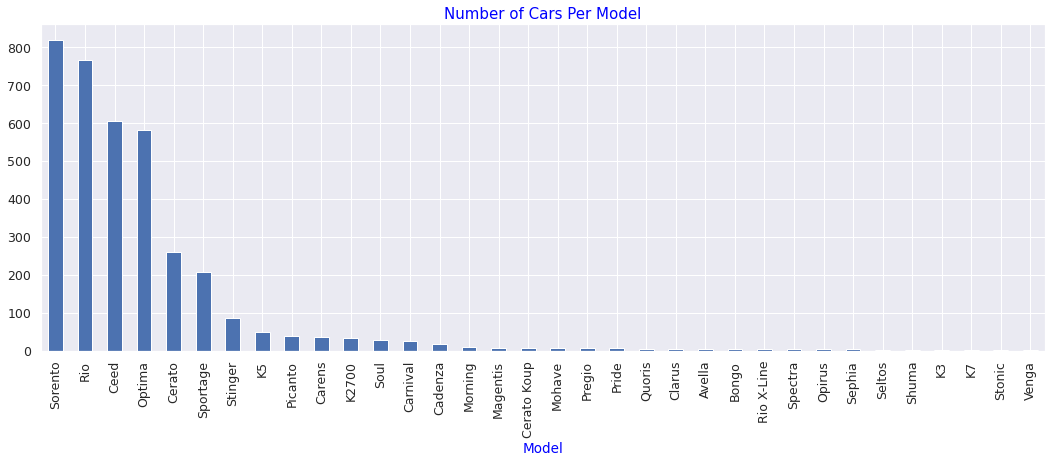

In [198]:
# Firstly, let's look at number of cars per model 
df['model'].value_counts().plot(kind = 'bar', figsize = (18,6),fontsize = 12.5)
plt.xlabel('Model',fontsize = 13.5,color = 'blue')
plt.title('Number of Cars Per Model',fontsize=15, color = 'blue')

 Most of the car models for sale are `Sorento`, `Rio`, `Ceed`, `Optima` and `Cerato` 

Text(0.5, 1.0, 'Cars by Region with More Than 10')

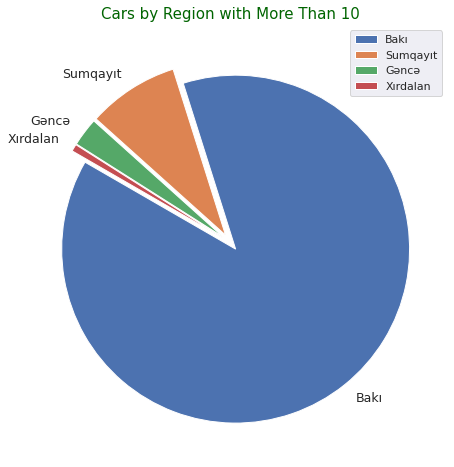

In [199]:
regions = df['city'].value_counts()
more_cars_regions = regions[regions > 10]
more_cars_regions.plot(kind = 'pie', figsize = (8,8),fontsize = 12.5, 
                                     explode = (0.05, 0.05,0.05, 0.05), 
                                     ylabel = '', 
                                     legend=True, 
                                     startangle= 150)
plt.title('Cars by Region with More Than 10',fontsize=15, color = '#006400')

Regions with most of the cars are `Bakl`, `Sumqayıt`, `Gəncə` and `Xırdalan`

Text(0.5, 1.0, 'Cars by Model Year')

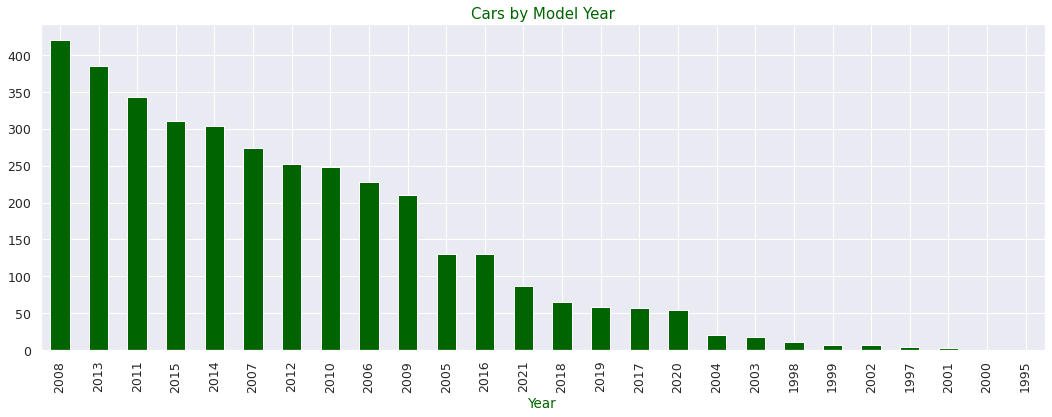

In [200]:
df['year'].value_counts().plot(kind = 'bar', figsize = (18,6),fontsize = 12.5,color = '#006400')
plt.xlabel('Year',fontsize = 13.5,color = '#006400')
plt.title('Cars by Model Year',fontsize=15, color = '#006400')

Model year of most of the cars are `2008`, `2013`, `2011`, `2015` and `2014` 

In [201]:
df['price'] = df['price'].str.replace(' ', '')
df['price'] = df['price'].str.replace('AZN', '')
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace('€', '')
df['price'] = df['price'].astype(str).astype(int)

Text(0.5, 1.0, 'Cars by Model Year')

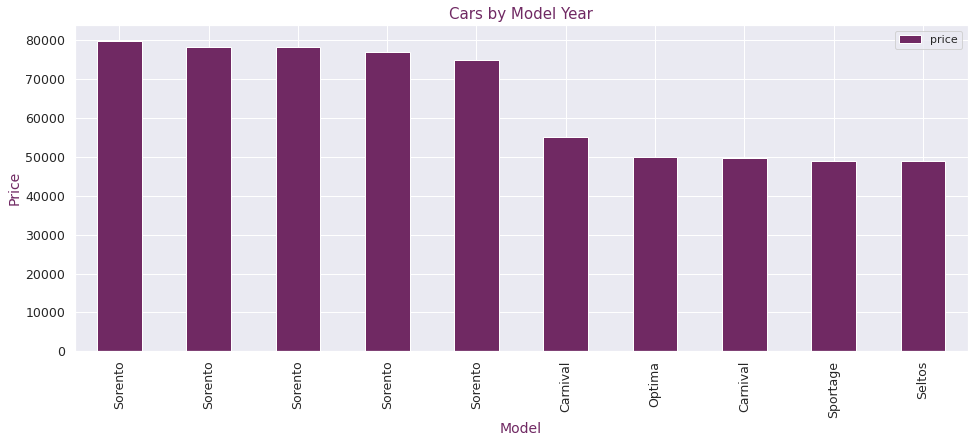

In [202]:
expensive_models = df.sort_values('price', ascending = False).head(10)
expensive_models.plot(kind = 'bar', x = 'model', y = 'price', figsize = (16,6),fontsize = 12.5,color = '#702963')
plt.xlabel('Model',fontsize = 14,color = '#702963')
plt.ylabel('Price',fontsize = 14,color = '#702963')
plt.title('Cars by Model Year',fontsize=15, color = '#702963')

In [206]:
fig = px.histogram(df, x="price", marginal="box", title='Price Distribution of Cars')
fig.update_layout(yaxis_title = 'Number of cars')
fig.update_layout(xaxis_title = 'Price')